In [14]:
import folium
import folium.plugins
import pandas as pd

stops = pd.read_csv('GTFS-Daten/stops.txt')
filtered_df = stops[['stop_id','stop_lat','stop_lon','stop_name']]

# m2 = folium.Map(location=(mean_lat,mean_lon), zoom_start=14)
m = folium.Map(location=(48.7624060,11.4257570), zoom_start=16)


#actual creation of map
fg = folium.FeatureGroup(name="Bus Stop View")
fg2 = folium.FeatureGroup(name="Live Bus View")

m.add_child(fg)
m.add_child(fg2)

folium.LayerControl(collapsed=False, control=True).add_to(m2)

# bus_icon = CustomIcon(icon_image=bus_icon_path, icon_size=(40, 40))
# bus_stop_icon = CustomIcon(icon_image=bus_stop_icon_path, icon_size=(30, 30))

stops_cluster = folium.plugins.MarkerCluster(
        name='Bus Stops',
        overlay=True,
        control=False,
        icon_create_function=None,).add_to(fg)

# vehicles_cluster = MarkerCluster(
#         name='Vehicles',
#         overlay=True,
#         control=True,
#     ).add_to(fg2)


for _, row in filtered_df.iterrows():
    # print(row['stop_name'])
    # print(row['stop_lat'], row['stop_lon'])
    marker = folium.Marker(
        location=[row['stop_lat'], row['stop_lon']],
        popup=row['stop_name'],
        tooltip=row['stop_name'],
    )
    stops_cluster.add_child(marker)
# for vehicle in live_vehicle_data:
#     try:
#         lon = vehicle["MonitoredVehicleJourney"]["VehicleLocation"]["Longitude"]
#         lat = vehicle["MonitoredVehicleJourney"]["VehicleLocation"]["Latitude"]
#         line = vehicle["MonitoredVehicleJourney"]["LineRef"]
#         destination = vehicle["MonitoredVehicleJourney"]["DestinationName"]
#         delay = vehicle["MonitoredVehicleJourney"]["Delay"] 
#         occupation_absolute = vehicle["Extensions"]["init-o:OccupancyData"]["init-o:PassengersNumber"]
#         occupation_percentage =vehicle["Extensions"]["init-o:OccupancyData"]["init-o:OccupancyPercentage"]
        
#         # Create a custom icon for the vehicles
        
#         # Create marker for vehicle
#         marker = folium.Marker(
#             location=[lat,lon],
#             popup=f"Vehicle on Line {line} to {destination},\nDelay:{delay},\nBus Occupancy: {occupation_absolute} passengers, {occupation_percentage}% full",
#             tooltip=line,
#             icon=bus_icon
#         )
#         vehicles_cluster.add_child(marker)
#     except KeyError:
#         # Handle the case where the vehicle data does not have valid location info
#         continue



stops_search = folium.plugins.Search(
    layer=stops_cluster,
    geom_type="Point",
    placeholder="Search for a Bus Stop",
    collapsed=True,
    search_label="name",
).add_to(m)

m

2367
92



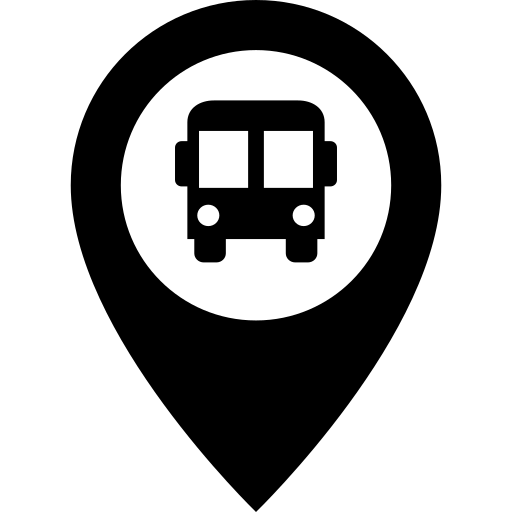

In [17]:
import folium
from folium.plugins import MarkerCluster, Search
import pandas as pd
import xmltodict
from folium import Icon, CustomIcon
from django.conf import settings
import os



BASE_DIR= "../.."

default_xml = os.path.join(BASE_DIR,"folium_app","static", "default.xml")

#this function assumes that stops.txt isnt dynamic and wont be changed
stops_path = os.path.join(BASE_DIR,"folium_app","static", "stops.txt")
bus_icon_path = os.path.join(BASE_DIR,"folium_app","static", "sprites", "bus.png")
bus_stop_icon_path = os.path.join(BASE_DIR,"folium_app","static", "sprites", "bushaltestelle.png")
destination_path = os.path.join(BASE_DIR,"folium_app","templates", "map2.html")
# print(stops_path)

#loading of datasets and xml file
stops_df = pd.read_csv(stops_path)
parent_station_list=stops_df['parent_station'].unique()
filtered_df = stops_df[~stops_df['stop_id'].isin(parent_station_list)][['stop_id','stop_lat','stop_lon', 'stop_name']]
print(len(filtered_df))
with open(default_xml, "r", encoding="ISO-8859-1") as f:
    xml_data = f.read()
raw_xml = xmltodict.parse(xml_data)
live_vehicle_data = raw_xml["Siri"]["ServiceDelivery"]["VehicleMonitoringDelivery"]["VehicleActivity"]
print(len(live_vehicle_data))
timestamp = raw_xml["Siri"]["ServiceDelivery"]["ResponseTimestamp"]

#this part just makes sure that the map starts off at the median location of the map
mean_lat,mean_lon = filtered_df['stop_lat'].median(),filtered_df['stop_lon'].median()
m2 = folium.Map(location=(mean_lat,mean_lon), zoom_start=14)

#actual creation of map
fg = folium.FeatureGroup(name="Bus Stop View")
fg2 = folium.FeatureGroup(name="Live Bus View")

m2.add_child(fg)
m2.add_child(fg2)

folium.LayerControl(collapsed=False, control=True).add_to(m2)

bus_icon = CustomIcon(icon_image=bus_icon_path, icon_size=(40, 40))
# bus_stop_icon = CustomIcon(icon_image=bus_stop_icon_path, icon_size=(30, 30))

stops_cluster = MarkerCluster(
        name='Bus Stops',
        overlay=True,
        control=False,
        icon_create_function=None,).add_to(fg)

# vehicles_cluster = MarkerCluster(
#         name='Vehicles',
#         overlay=True,
#         control=True,
#     ).add_to(fg2)

cloud = folium.Icon(icon="cloud")

for _, row in filtered_df.iterrows():
    # print(row['stop_name'])
    # print(row['stop_lat'], row['stop_lon'])
    marker = folium.Marker(
        location=[row['stop_lat'], row['stop_lon']],
        popup=row['stop_name'],
        tooltip=row['stop_name'],
        icon=bus_icon
    )
    stops_cluster.add_child(marker)
# for vehicle in live_vehicle_data:
#     try:
#         lon = vehicle["MonitoredVehicleJourney"]["VehicleLocation"]["Longitude"]
#         lat = vehicle["MonitoredVehicleJourney"]["VehicleLocation"]["Latitude"]
#         line = vehicle["MonitoredVehicleJourney"]["LineRef"]
#         destination = vehicle["MonitoredVehicleJourney"]["DestinationName"]
#         delay = vehicle["MonitoredVehicleJourney"]["Delay"] 
#         occupation_absolute = vehicle["Extensions"]["init-o:OccupancyData"]["init-o:PassengersNumber"]
#         occupation_percentage =vehicle["Extensions"]["init-o:OccupancyData"]["init-o:OccupancyPercentage"]
        
#         # Create a custom icon for the vehicles
        
#         # Create marker for vehicle
#         marker = folium.Marker(
#             location=[lat,lon],
#             popup=f"Vehicle on Line {line} to {destination},\nDelay:{delay},\nBus Occupancy: {occupation_absolute} passengers, {occupation_percentage}% full",
#             tooltip=line,
#             icon=bus_icon
#         )
#         vehicles_cluster.add_child(marker)
#     except KeyError:
#         # Handle the case where the vehicle data does not have valid location info
#         continue



stops_search = Search(
    layer=stops_cluster,
    geom_type="Point",
    placeholder="Search for a Bus Stop",
    collapsed=True,
    search_label="name",
).add_to(m2)

# Search(
#     layer=stops_cluster,
#     geom_type="Point",
#     placeholder="Search for a Bus Stop",
#     collapsed=True,
#     search_label="name",
# ).add_to(m)

m2